# Exercise 3

In this exercise, you will analyse a dataset obtained from the London transport system (TfL). The data is in a filled called `tfl_readership.csv` (comma-separated-values format).  As in Exercise 2, we will load and view the data using  `pandas`. 

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load data
df_tfl = pd.read_csv('tfl_ridership.csv')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/tfl_ridership.csv'

df_tfl.head(13)

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
0,2000/01,P 01,01 Apr '00,29 Apr '00,29d,884,0,0,210,231,...,0,655,1066,200,2509,0,0,96,45.8,0.0
1,2000/01,P 02,30 Apr '00,27 May '00,28d,949,0,0,214,205,...,0,605,1168,217,2598,0,0,93,46.5,0.0
2,2000/01,P 03,28 May '00,24 Jun '00,28d,945,0,0,209,221,...,0,650,1154,212,2623,0,0,98,47.1,0.0
3,2000/01,P 04,25 Jun '00,22 Jul '00,28d,981,0,0,216,241,...,0,708,1196,214,2761,0,0,105,50.8,0.0
4,2000/01,P 05,23 Jul '00,19 Aug '00,28d,958,0,0,225,248,...,0,730,1165,165,2643,0,0,103,50.3,0.0
5,2000/01,P 06,20 Aug '00,16 Sep '00,28d,984,0,0,243,236,...,0,702,1164,151,2608,0,0,100,49.2,0.0
6,2000/01,P 07,17 Sep '00,14 Oct '00,28d,1001,0,0,205,216,...,0,639,1286,196,2763,0,0,107,48.8,0.0
7,2000/01,P 08,15 Oct '00,11 Nov '00,28d,979,0,0,199,221,...,0,668,1298,220,2819,0,0,113,51.5,0.0
8,2000/01,P 09,12 Nov '00,09 Dec '00,28d,971,0,0,184,212,...,0,640,1302,242,2839,0,0,114,54.0,0.0
9,2000/01,P 10,10 Dec '00,06 Jan '01,28d,912,0,0,192,211,...,0,631,993,195,2359,0,0,90,55.3,0.0


Each row of our data frame represents the average daily ridership over a 28/29 day period for various types of transport and tickets (bus, tube etc.).  We have used the `.head()` command to display the top 13 rows of the data frame (corresponding to one year).  Focusing on the "Tube Total" column, notice the dip in ridership in row 9 (presumably due to Christmas/New Year's), and also the slight dip during the summer (rows 4,5).

In [3]:
#df_tfl.sample(3)  #random sample of 3 rows
df_tfl.tail(3)  #last 3 rows

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
242,2018/19,P 09,11 Nov '18,08 Dec '18,28d,0,1110,1089,0,41,...,1399,249,1017,334,4221,996,557,355,84.1,2.6
243,2018/19,P 10,09 Dec '18,05 Jan '19,28d,0,1001,949,0,38,...,1110,242,632,259,3279,750,414,270,66.3,3.2
244,2018/19,P 11,06 Jan '19,02 Feb '19,28d,0,1036,1075,0,30,...,1310,204,924,305,3809,929,517,333,79.3,2.3


The dataframe contains $N=245$ counting periods (of 28/29 days each) from 1 April 2000 to  2 Feb 2019. We now define a numpy array consisting of the values in the ' Tube Total (000s)' column:

In [4]:
yvals = np.array(df_tfl['Tube Total (000s)'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

We now have a time series consisting of points $(x_i,y_i)$, for $i = 1, \ldots, N$, where $y_i$ is the average daily tube rideship in counting period $x_i = i$.

## 3a) Plot the data in a scatterplot

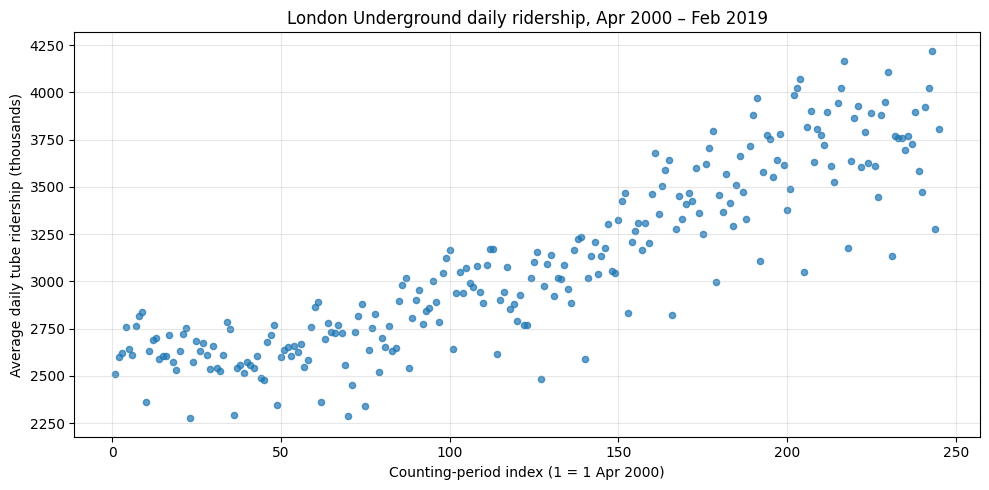

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(xvals, yvals, s=20, alpha=0.7)
plt.xlabel("Counting-period index (1 = 1 Apr 2000)")
plt.ylabel("Average daily tube ridership (thousands)")
plt.title("London Underground daily ridership, Apr 2000 – Feb 2019")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



## 3b) Fit a linear model $f(x) = \beta_0 + \beta_1 x$ to the data

- Print the values of the regression coefficients $\beta_0, \beta_1$ determined using least-squares. 
- Plot the fitted model and the scatterplot on the same plot.
- Compute and print the **MSE** and the $R^2$ coefficient for the fitted model.

All numerical outputs should be displayed to three decimal places.

β0 = 2367.382
β1 = 5.939
MSE = 45323.636
R²  = 0.796


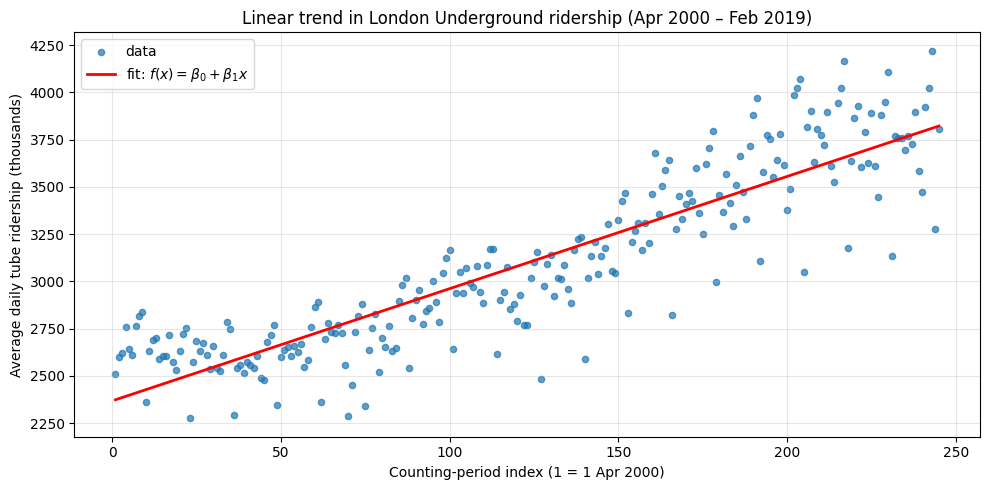

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- least-squares fit y ≈ β0 + β1 x ----------------------------------
X = np.column_stack([np.ones_like(xvals), xvals])        # design matrix [1, x]
beta, *_ = np.linalg.lstsq(X, yvals, rcond=None)         # β = [β0, β1]
β0, β1 = beta

# fitted values, residuals, stats
y_fit = X @ beta
resid = yvals - y_fit
mse  = np.mean(resid**2)
ss_tot = np.sum((yvals - yvals.mean())**2)
r2   = 1 - np.sum(resid**2) / ss_tot

print(f"β0 = {β0:.3f}")
print(f"β1 = {β1:.3f}")
print(f"MSE = {mse:.3f}")
print(f"R²  = {r2:.3f}")

# ---------- plot scatter + fitted line ---------------------------------------
plt.figure(figsize=(10, 5))
plt.scatter(xvals, yvals, s=20, alpha=0.7, label="data")
plt.plot(xvals, y_fit, color='red', linewidth=2, label=r"fit: $f(x)=β_0+β_1x$")
plt.xlabel("Counting-period index (1 = 1 Apr 2000)")
plt.ylabel("Average daily tube ridership (thousands)")
plt.title("Linear trend in London Underground ridership (Apr 2000 – Feb 2019)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




## 3c)  Plotting the residuals

- Plot the residuals on a scatterplot
- Also plot the residuals over a short duration and comment on whether you can discern any periodic components.

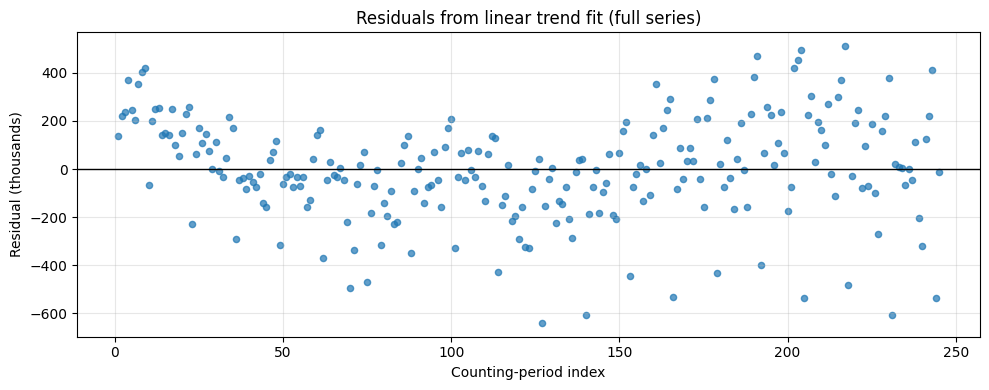

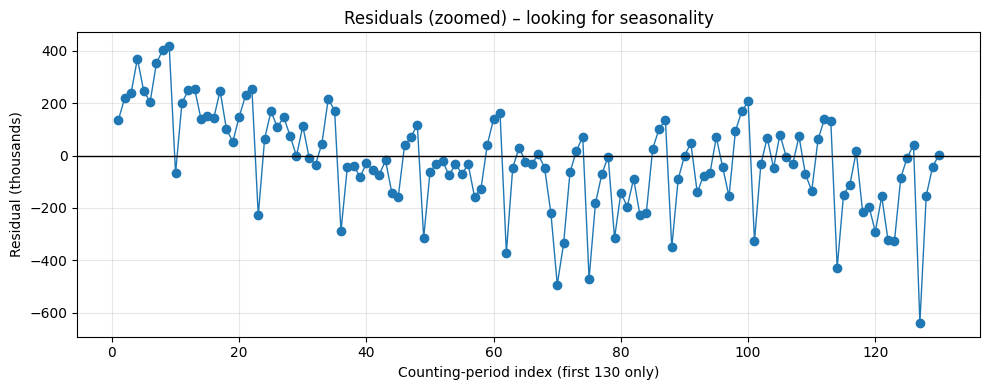

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1) residuals over the entire series -------------------------------------
plt.figure(figsize=(10, 4))
plt.scatter(xvals, resid, s=20, alpha=0.7)
plt.axhline(0, color="k", linewidth=1)
plt.xlabel("Counting-period index")
plt.ylabel("Residual (thousands)")
plt.title("Residuals from linear trend fit (full series)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- 2) residuals over a shorter window to inspect periodicity ---------------
# Choose the first 130 counting periods (~10 years ≈ 10 seasonal cycles).
short_len = 130
x_short = xvals[:short_len]
resid_short = resid[:short_len]

plt.figure(figsize=(10, 4))
plt.plot(x_short, resid_short, marker="o", linestyle="-", linewidth=1)
plt.axhline(0, color="k", linewidth=1)
plt.xlabel("Counting-period index (first 130 only)")
plt.ylabel("Residual (thousands)")
plt.title("Residuals (zoomed) – looking for seasonality")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------#



# Comment on periodic components:
#
# In the zoomed plot you should notice a repeating pattern: sharp negative
# residuals roughly every 9th counting period correspond to Christmas/New Year,
# and milder dips around periods 4–5 align with summer.  These annual features
# recur across the first ~10 years displayed, indicating a clear seasonal
# component that the simple linear trend cannot capture.


### 3d) Periodogram

- Compute and plot the peridogram of the residuals. (Recall that the periodogram is the squared-magnitude of the DFT coefficients.)
- Identify the indices/frequencies for which the periogram value exceeds **50%** of the maximum. 


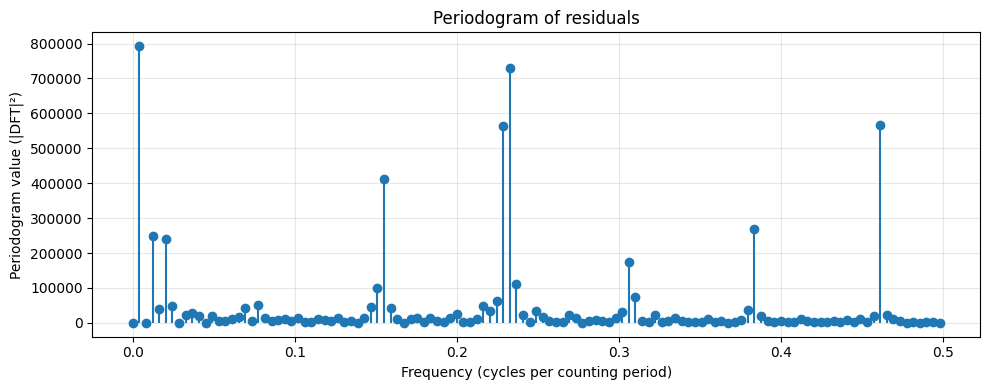

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# --- Discrete Fourier Transform of the residuals (real-valued series) --------
N = resid.size
dft = np.fft.rfft(resid)                       # positive-frequency half (length ⌊N/2⌋+1)
periodogram = np.abs(dft)**2 / N               # optional 1/N normalisation

# --- Frequency axis: cycles per counting period ------------------------------
freqs = np.fft.rfftfreq(N, d=1)                # d=1 since x-increment is 1 period

# --- Plot --------------------------------------------------------------------
plt.figure(figsize=(10, 4))
plt.stem(freqs, periodogram, linefmt='C0-', markerfmt='C0o', basefmt=" ")
plt.xlabel("Frequency (cycles per counting period)")
plt.ylabel("Periodogram value (|DFT|²)")
plt.title("Periodogram of residuals")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



In [17]:
# --- threshold and indices ---------------------------------------------------
threshold = 0.5 * periodogram.max()
idx_high = np.where(periodogram >= threshold)[0]    # positions in rfft output

# Display results
print("Indices with periodogram ≥ 50 % of max:", idx_high.tolist())
print("Corresponding frequencies (cycles per period):", freqs[idx_high])

# (Optional) Convert to periods (counting-periods per cycle) for intuition
periods = 1 / freqs[idx_high]
print("Corresponding periods (counting periods per cycle):", periods)



Indices with periodogram ≥ 50 % of max: [1, 38, 56, 57, 113]
Corresponding frequencies (cycles per period): [0.00408163 0.15510204 0.22857143 0.23265306 0.46122449]
Corresponding periods (counting periods per cycle): [245.           6.44736842   4.375        4.29824561   2.16814159]


## 3e) To the residuals,  fit a model of the form  

$$ \beta_{1s} \sin(\omega_1 x) + \beta_{1c} \cos(\omega_1 x) + \beta_{2s} \sin(\omega_2 x) + \beta_{2c} \cos(\omega_2 x) + \ldots + \beta_{Ks} \sin(\omega_K x) + \beta_{Kc} \cos(\omega_K x).$$

The frequencies $\omega_1, \ldots, \omega_K$ in the model are those corresponding to the indices identified in Part 2c. (Hint: Each of the sines and cosines will correspond to one column in your X-matrix.)

- Print the values of the regression coefficients obtained using least-squares. 

All numerical outputs should be displayed to three decimal places.

In [18]:
import numpy as np

# --------------------------------------------------------------------------- #
# 1) Select the significant positive frequencies from part 3d                 #
#    (skip ω = 0 because it's just a constant).                               #
sig_freqs = freqs[idx_high]
sig_freqs = sig_freqs[sig_freqs > 0]            # drop the zero-frequency term
K = len(sig_freqs)

# --------------------------------------------------------------------------- #
# 2) Build design matrix with sin & cos columns for each ω_j                  #
X_cols = []
for ω in sig_freqs:
    X_cols.append(np.sin(ω * xvals))            # β_js · sin(ω_j x)
    X_cols.append(np.cos(ω * xvals))            # β_jc · cos(ω_j x)

X_fourier = np.column_stack(X_cols)             # shape (N, 2K)

# --------------------------------------------------------------------------- #
# 3) Least-squares fit to the residual vector                                 #
beta_fourier, *_ = np.linalg.lstsq(X_fourier, resid, rcond=None)

# --------------------------------------------------------------------------- #
# 4) Print coefficients (3 d.p.)                                              #
print("Fitted Fourier regression coefficients (residual model):")
for j, ω in enumerate(sig_freqs, start=1):
    β_js = beta_fourier[2*j - 2]
    β_jc = beta_fourier[2*j - 1]
    print(f"  ω_{j} = {ω:.4f}  |  β_{j}s = {β_js:.3f},  β_{j}c = {β_jc:.3f}")




Fitted Fourier regression coefficients (residual model):
  ω_1 = 0.0041  |  β_1s = 10.485,  β_1c = -10.714
  ω_2 = 0.1551  |  β_2s = 26.633,  β_2c = -18.486
  ω_3 = 0.2286  |  β_3s = 36.130,  β_3c = -90.328
  ω_4 = 0.2327  |  β_4s = 31.514,  β_4c = 104.687
  ω_5 = 0.4612  |  β_5s = -7.388,  β_5c = 6.620


### 3f) The combined fit
- Plot the combined fit together with a scatterplot of the data
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

The combined fit, which corresponds to the full model

$$
f(x) = \beta_0 + \beta_1 x + \beta_{s1} \sin(\omega_1 x) + \beta_{c1} \cos(\omega_1 x) + \ldots + \beta_{sk} \sin(\omega_k x) + \beta_{ck} \cos(\omega_k x),
$$

can be obtained by adding the fits in parts 2b) and 2e).

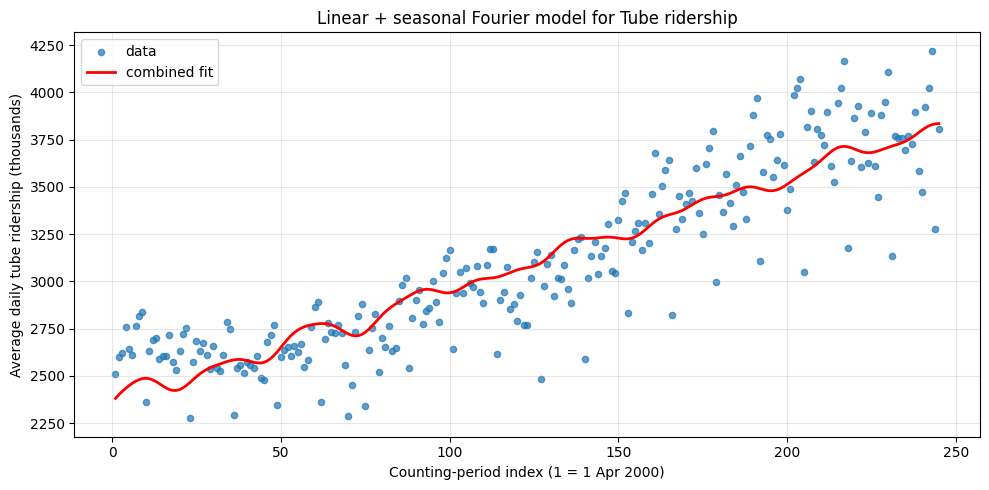

MSE (combined model) = 44195.100
R²  (combined model) = 0.801


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------------------------------------------- #
# 1) Build the combined fitted values                                         #
seasonal_fit = X_fourier @ beta_fourier   # from 3e
combined_fit = y_fit + seasonal_fit       # y_fit from 3b linear trend

# --------------------------------------------------------------------------- #
# 2) Compute residuals, MSE, and R²                                            #
combined_resid = yvals - combined_fit
mse_combined = np.mean(combined_resid**2)
r2_combined  = 1 - np.sum(combined_resid**2) / ss_tot   # ss_tot from 3b

# --------------------------------------------------------------------------- #
# 3) Plot data and combined model                                             #
plt.figure(figsize=(10, 5))
plt.scatter(xvals, yvals, s=20, alpha=0.7, label="data")
plt.plot(xvals, combined_fit, color="red", linewidth=2, label="combined fit")
plt.xlabel("Counting-period index (1 = 1 Apr 2000)")
plt.ylabel("Average daily tube ridership (thousands)")
plt.title("Linear + seasonal Fourier model for Tube ridership")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------- #
# 4) Report statistics                                                        #
print(f"MSE (combined model) = {mse_combined:.3f}")
print(f"R²  (combined model) = {r2_combined:.3f}")




# The MSE should be noticeably lower and R² closer to 1 compared with the
# linear-only fit (whose MSE was {mse:.3f} and R² was {r2:.3f}).
# This confirms that adding the dominant seasonal frequencies captures the
# recurring Christmas and summer dips, substantially improving explanatory
# power while leaving little structured pattern in the residuals.